# Pertemuan III

# Exploratory Data Analysis (EDA)

Pada praktikum ini, Anda akan melihat beberapa contoh Exploratory Data Analysis (EDA) pada data set sensus penghasilan. 

* [Pengambilan Data](#1)
* [Univariate analysis](#2)
* [Bivariate analysis](#3)

<a id="1"></a>

# 1. Pengambilan Data:

## 1.1 Import packages

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

## 1.2 Import data

In [3]:
data = pd.read_csv("https://gitlab.com/andreass.bayu/file-directory/-/raw/main/adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


<a id="1"></a>

# Tugas

## 1. Univariate analysis

## 1.1 hours-per-week

### **i.	Distribusi**

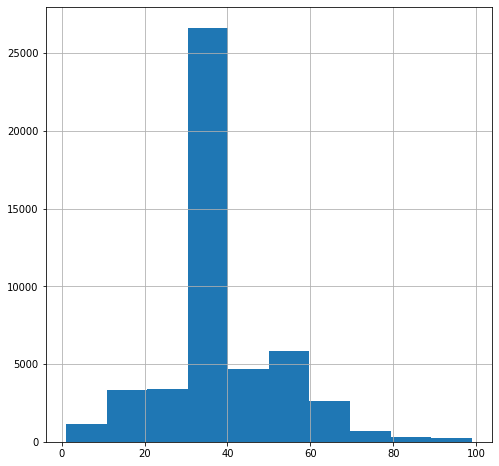

In [10]:
data['hours-per-week'].hist(figsize=(8,8))
plt.show()

In [8]:
data[data["hours-per-week"]>70].shape

(774, 15)

### **ii.	Deskripsi**
Histogram di atas menjelaskan bahwa :
*  atribut "hours-per-week" tidak simetris.
*  Seperti membentuk Kubah pada bagian 30-40 jam/minggu.
*  Jam/minggu minimum dan maksimum adalah 2 jam dan 98 jam.
*  Dataset ini memiliki lebih sedikit pengamatan (774) tentang jam/minggu tertentu, yaitu 98/minggu.


## 1.2 Income

### **i.	Distribusi**

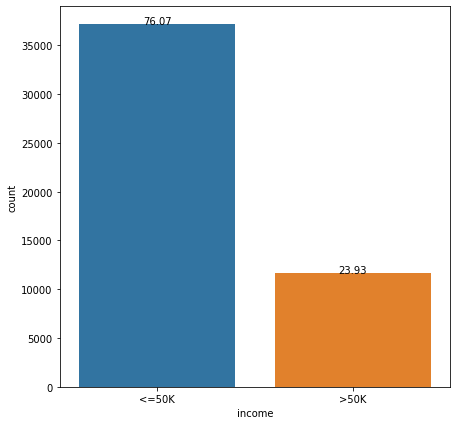

In [5]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii. Deskripsi**
Distribusi di atas menjelaskan bahwa :
* **Dataset ini tidak seimbang, yaitu 23,93% di antaranya termasuk dalam kelompok pendapatan 1 (yang berpenghasilan lebih dari \\$50K) dan 76% termasuk dalam kelompok pendapatan 0 (yang berpenghasilan kurang dari \\$50K).**


# 2. Bivariate analysis

## 2.1 hours-per-week - income (Hubungan)

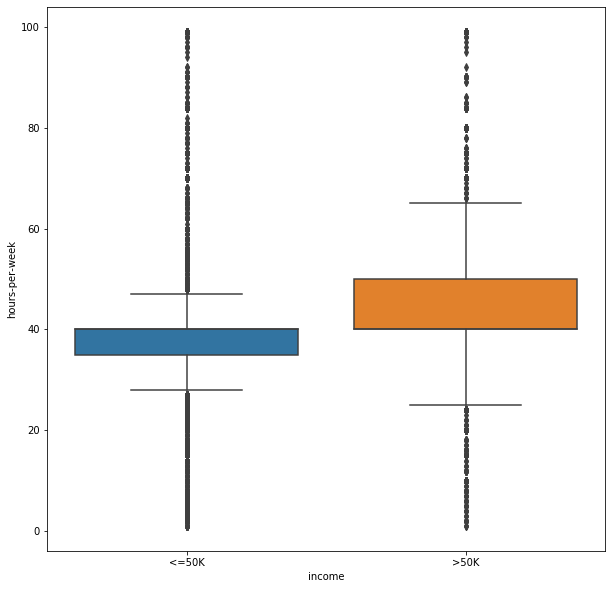

In [6]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="hours-per-week", data=data)
plt.show()

In [9]:
data[['income', 'hours-per-week']].groupby(['income'], as_index=False).mean().sort_values(by='hours-per-week', ascending=False)

,income,hours-per-week
1,>50K,45.452896
0,<=50K,38.840048


### ii. Deskripsi
Bivariate boxplot di atas menjelaskan bahwa :
* Rata-rata "hours-per-week" untuk kelompok Penghasilan (<= \\$50K) adalah 38,84 jam/minggu. Dan untuk kelompok Penghasilan (> \\$50K) adalah 45,45 jam/minggu
* Kelompok pendapatan(<=50K) memiliki median "hours-per-week"(38,84 jam/minggu) lebih rendah daripada kelompok Pendapatan(>50K) yang memiliki median "hours-per-week"(45,45 jam/minggu).

### iii. Uji Hipotesis (untuk menguji hubungan antara hours-per-week & Income )
Dalam contoh ini kita dapat mengatakan bahwa:

    Null Hypothesis :- tidak ada perbedaan Rerata kelompok pendapatan >50k dan kelompok pendapatan <=50k.
    Alternate Hypothesis :- ada perbedaan Rerata kelompok pendapatan >50k dan kelompok pendapatan <=50k.

In [11]:
import random

data = data[(np.abs(stats.zscore(data["age"])) < 3)] 

income_1 = data[data['income']=='<=50K']['hours-per-week']
income_0 = data[data['income']=='>50K']['hours-per-week']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [12]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("null hypothesis ditolak")
else:
    print("null hypothesis diterima")

ttest -1.7694020551989222
p value 0.07836974310803149
null hypothesis diterima


### iv. Kesimpulan akhir

Menggunakan analisis statistik,

    Dapat disimpulkan bahwa terdapat perbedaan yang signifikan pada rerata jam/minggu kelompok berpenghasilan >50K dan kelompok berpenghasilan <=50K.
    Hal Ini membuktikan bahwa usia memiliki peranan dalam membedakan kelompok pendapatan.